<a href="https://colab.research.google.com/github/kilinandrea/FDA_Applications_1998-2023/blob/main/Copy_of_FDA_applications_1998_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A look at FDA applications (1998-2023)
### Companies with most applications, distribution of marketing status, most and least used drug administration forms, and a timeline of applications through the years.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

## Let's bring in the 5 datasets, and start joining them to form a final table.

In [ ]:
marketing_lookup_source = 'https://raw.githubusercontent.com/kilinandrea/FDA_Applications_1998-2023/main/MarketingStatus_Lookup.txt'
df_marketing_lookup = pd.read_csv(marketing_lookup_source, delimiter='\t')

marketing_status_source = 'https://raw.githubusercontent.com/kilinandrea/FDA_Applications_1998-2023/main/MarketingStatus.txt'
df_marketing_status = pd.read_csv(marketing_status_source, delimiter='\t')

applications_source = 'https://raw.githubusercontent.com/kilinandrea/FDA_Applications_1998-2023/main/Applications.txt'
df_applications = pd.read_csv(applications_source, delimiter='\t')

application_docs_source = 'https://raw.githubusercontent.com/kilinandrea/FDA_Applications_1998-2023/main/ApplicationDocs.txt'
df_application_docs = pd.read_csv(application_docs_source, delimiter='\t', encoding='ISO-8859-1')  # Specify encoding here

products_source = 'https://raw.githubusercontent.com/kilinandrea/FDA_Applications_1998-2023/main/Products_c.txt'
df_products = pd.read_csv(products_source, delimiter='\t', encoding='utf-16') # Specify encoding here


In [ ]:
#check if the data has been pulled in properly
df_marketing_lookup.head()
#df_marketing_status.head()
#df_applications.head()
#df_application_docs.head()
#df_products.head()

,MarketingStatusID,MarketingStatusDescription
0,1,Prescription
1,2,Over-the-counter
2,3,Discontinued
3,4,None (Tentative Approval)


In [ ]:
# merge datasets based on their primary key
merged_df = pd.merge(df_products, df_marketing_status, on='ApplNo', how = 'inner')
merged_df = pd.merge(merged_df, df_marketing_lookup, on = 'MarketingStatusID', how = 'inner')
merged_df = pd.merge(merged_df, df_applications, on = 'ApplNo', how = 'inner')
merged_df = pd.merge(merged_df, df_application_docs, on = 'ApplNo', how = 'inner')
merged_df.head()

,ApplNo,ProductNo_x,Form,Strength,ReferenceDrug,DrugName,ActiveIngredient,ReferenceStandard,MarketingStatusID,ProductNo_y,...,ApplType,ApplPublicNotes,SponsorName,ApplicationDocsID,ApplicationDocsTypeID,SubmissionType,SubmissionNo,ApplicationDocsTitle,ApplicationDocsURL,ApplicationDocsDate
0,793,2,TABLET --ORAL,15MG **Federal Register determination that pro...,0.0,BUTISOL SODIUM,BUTABARBITAL SODIUM,0.0,3,2,...,NDA,NaN,MYLAN SPECIALITY LP,45,1,SUPPL,25,0,http://www.accessdata.fda.gov/drugsatfda_docs/...,2007-10-04 00:00:00
1,793,2,TABLET --ORAL,15MG **Federal Register determination that pro...,0.0,BUTISOL SODIUM,BUTABARBITAL SODIUM,0.0,3,2,...,NDA,NaN,MYLAN SPECIALITY LP,32916,2,SUPPL,25,0,http://www.accessdata.fda.gov/drugsatfda_docs/...,2007-10-04 00:00:00
2,793,2,TABLET --ORAL,15MG **Federal Register determination that pro...,0.0,BUTISOL SODIUM,BUTABARBITAL SODIUM,0.0,3,2,...,NDA,NaN,MYLAN SPECIALITY LP,43991,10,ORIG,1,0,http://www.fda.gov/Drugs/DrugSafety/Postmarket...,2007-03-16 00:00:00
3,793,2,TABLET --ORAL,15MG **Federal Register determination that pro...,0.0,BUTISOL SODIUM,BUTABARBITAL SODIUM,0.0,3,2,...,NDA,NaN,MYLAN SPECIALITY LP,57473,2,SUPPL,26,0,http://www.accessdata.fda.gov/drugsatfda_docs/...,2019-02-07 00:00:00
4,793,2,TABLET --ORAL,15MG **Federal Register determination that pro...,0.0,BUTISOL SODIUM,BUTABARBITAL SODIUM,0.0,3,2,...,NDA,NaN,MYLAN SPECIALITY LP,57594,1,SUPPL,26,0,http://www.accessdata.fda.gov/drugsatfda_docs/...,2019-02-14 00:00:00


### Great, now that we have one table, let's start cleaning it up.

In [ ]:
#remove unneeded columns
columns_to_drop = ['ProductNo_x', 'Strength', 'ReferenceDrug', 'ReferenceStandard', 'ProductNo_y', 'ApplType', 'ApplPublicNotes',
                   'ApplicationDocsTypeID', 'SubmissionType', 'SubmissionNo', 'ApplicationDocsTitle', 'ApplicationDocsURL',
                   'MarketingStatusID']

merged_df = merged_df.drop(columns=columns_to_drop)


#fix datetime to date only
merged_df['ApplicationDocsDate'] = pd.to_datetime(merged_df['ApplicationDocsDate'])
merged_df['ApplicationDocsDate'] = merged_df['ApplicationDocsDate'].dt.strftime('%Y-%m-%d')

#sort to see any duplicates
merged_df = merged_df.sort_values(by='ApplicationDocsID')

#drop any duplicates
merged_df = merged_df.drop_duplicates()

In [ ]:
merged_df.head(15)

,ApplNo,Form,DrugName,ActiveIngredient,MarketingStatusDescription,SponsorName,ApplicationDocsID,ApplicationDocsDate
698,4782,TABLET --ORAL,PREMARIN,"ESTROGENS, CONJUGATED",Prescription,WYETH PHARMS,1,2003-07-28
214,4782,TABLET --ORAL,PREMARIN,"ESTROGENS, CONJUGATED",Discontinued,WYETH PHARMS,1,2003-07-28
1579,4782,TABLET --ORAL,PREMARIN,"ESTROGENS, CONJUGATED",Prescription,WYETH PHARMS,2,2002-11-27
127,4782,TABLET --ORAL,PREMARIN,"ESTROGENS, CONJUGATED",Discontinued,WYETH PHARMS,2,2002-11-27
480,4782,TABLET --ORAL,PREMARIN,"ESTROGENS, CONJUGATED",Prescription,WYETH PHARMS,3,2003-05-16
172,4782,TABLET --ORAL,PREMARIN,"ESTROGENS, CONJUGATED",Discontinued,WYETH PHARMS,3,2003-05-16
701,4782,TABLET --ORAL,PREMARIN,"ESTROGENS, CONJUGATED",Prescription,WYETH PHARMS,4,2005-04-12
129,4782,TABLET --ORAL,PREMARIN,"ESTROGENS, CONJUGATED",Discontinued,WYETH PHARMS,4,2005-04-12
1230,4782,TABLET --ORAL,PREMARIN,"ESTROGENS, CONJUGATED",Prescription,WYETH PHARMS,5,2005-08-04
262,4782,TABLET --ORAL,PREMARIN,"ESTROGENS, CONJUGATED",Discontinued,WYETH PHARMS,5,2005-08-04


In [ ]:
#remove duplicates based on two columns
merged_df = merged_df.drop_duplicates(subset=['ApplNo', 'ApplicationDocsDate'])
merged_df.head(15)

,ApplNo,Form,DrugName,ActiveIngredient,MarketingStatusDescription,SponsorName,ApplicationDocsID,ApplicationDocsDate
698,4782,NaN,PREMARIN,"ESTROGENS, CONJUGATED",Prescription,WYETH PHARMS,1,2003-07-28
1579,4782,NaN,PREMARIN,"ESTROGENS, CONJUGATED",Prescription,WYETH PHARMS,2,2002-11-27
480,4782,NaN,PREMARIN,"ESTROGENS, CONJUGATED",Prescription,WYETH PHARMS,3,2003-05-16
701,4782,NaN,PREMARIN,"ESTROGENS, CONJUGATED",Prescription,WYETH PHARMS,4,2005-04-12
1230,4782,NaN,PREMARIN,"ESTROGENS, CONJUGATED",Prescription,WYETH PHARMS,5,2005-08-04
439,4782,NaN,PREMARIN,"ESTROGENS, CONJUGATED",Prescription,WYETH PHARMS,6,2005-11-03
1452,4782,NaN,PREMARIN,"ESTROGENS, CONJUGATED",Prescription,WYETH PHARMS,7,2006-09-18
1541,4782,NaN,PREMARIN,"ESTROGENS, CONJUGATED",Prescription,WYETH PHARMS,8,2011-10-31
663,4782,NaN,PREMARIN,"ESTROGENS, CONJUGATED",Prescription,WYETH PHARMS,10,2014-12-04
324676,5213,NaN,HYCODAN,HOMATROPINE METHYLBROMIDE -- HYDROCODONE BITAR...,Prescription,GENUS,14,2009-01-30


In [ ]:
# Let's remove any submission for discontinuation
merged_df = merged_df[merged_df['MarketingStatusDescription'] != 'Discontinued']

# Clean up the naming convention of the way in which the drug is being administered, 'Form'
merged_df.loc[:, 'Form'] = merged_df['Form'].str.extract(r'--\s*(.*)')[0]

merged_df.head(15)


,ApplNo,Form,DrugName,ActiveIngredient,MarketingStatusDescription,SponsorName,ApplicationDocsID,ApplicationDocsDate
698,4782,NaN,PREMARIN,"ESTROGENS, CONJUGATED",Prescription,WYETH PHARMS,1,2003-07-28
1579,4782,NaN,PREMARIN,"ESTROGENS, CONJUGATED",Prescription,WYETH PHARMS,2,2002-11-27
480,4782,NaN,PREMARIN,"ESTROGENS, CONJUGATED",Prescription,WYETH PHARMS,3,2003-05-16
701,4782,NaN,PREMARIN,"ESTROGENS, CONJUGATED",Prescription,WYETH PHARMS,4,2005-04-12
1230,4782,NaN,PREMARIN,"ESTROGENS, CONJUGATED",Prescription,WYETH PHARMS,5,2005-08-04
439,4782,NaN,PREMARIN,"ESTROGENS, CONJUGATED",Prescription,WYETH PHARMS,6,2005-11-03
1452,4782,NaN,PREMARIN,"ESTROGENS, CONJUGATED",Prescription,WYETH PHARMS,7,2006-09-18
1541,4782,NaN,PREMARIN,"ESTROGENS, CONJUGATED",Prescription,WYETH PHARMS,8,2011-10-31
663,4782,NaN,PREMARIN,"ESTROGENS, CONJUGATED",Prescription,WYETH PHARMS,10,2014-12-04
324676,5213,NaN,HYCODAN,HOMATROPINE METHYLBROMIDE -- HYDROCODONE BITAR...,Prescription,GENUS,14,2009-01-30


## Now, let's look at some graphs to better understand the data.

We want to see five graphs:

1. Timeline of FDA Applications
2. Top 10 companies with most FDA applications
3. Distribution of Marketing Status
4. Top 10 Drug Administration Forms
5. Bottom 5 Drug Administration Forms


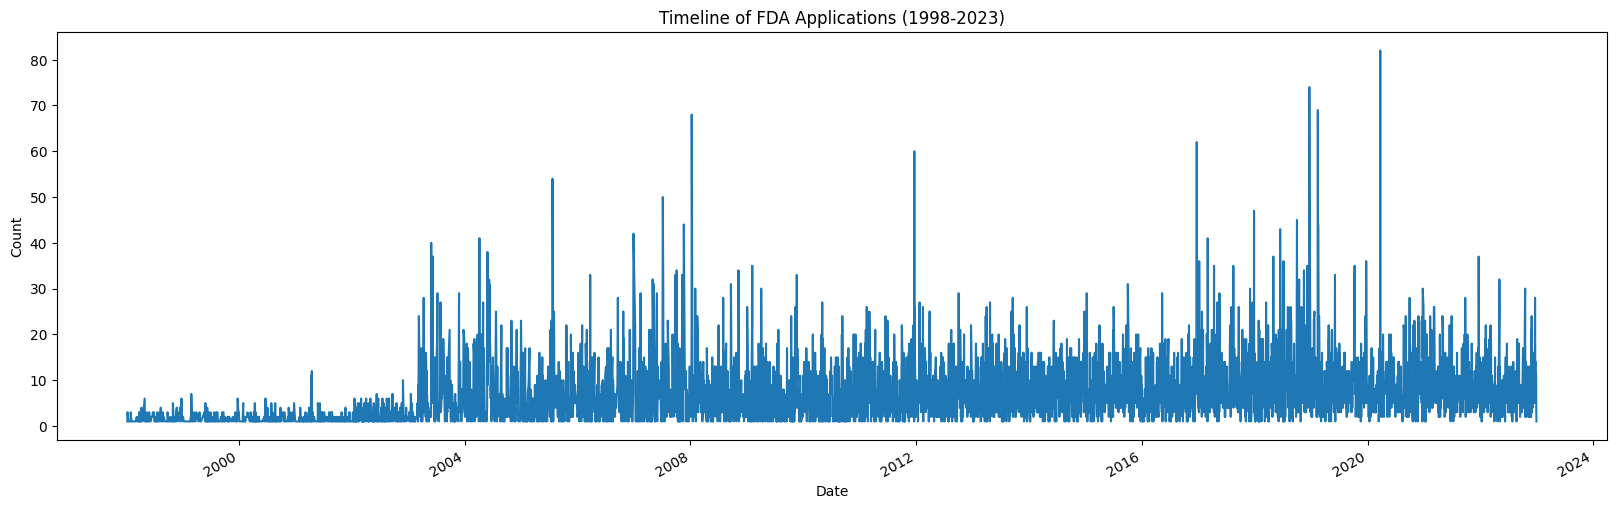

In [ ]:
# Let's see the frequency of application throughout the years
merged_df['ApplicationDocsDate'] = pd.to_datetime(merged_df['ApplicationDocsDate'])

# Filter DataFrame for the desired timeline
filtered_df = merged_df[(merged_df['ApplicationDocsDate'].dt.year >= 1998) & (merged_df['ApplicationDocsDate'].dt.year <= 2022)]

# Plot the timeline
plt.figure(figsize=(20, 6))
filtered_df['ApplicationDocsDate'].value_counts().sort_index().plot(kind='line')
plt.title('Timeline of FDA Applications (1998-2023)')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()


From the generated graph, we can observe that in the beginning of our timeline, between 1988 and 2003 the total number of FDA applications is much lower than in the time after 2003. We notice spikes around 2005, 2008, 2011, 2017, 2018, 2020 and 2023. Perhaps the most dense is between 2003-2008 and later between 2017 and 2019.

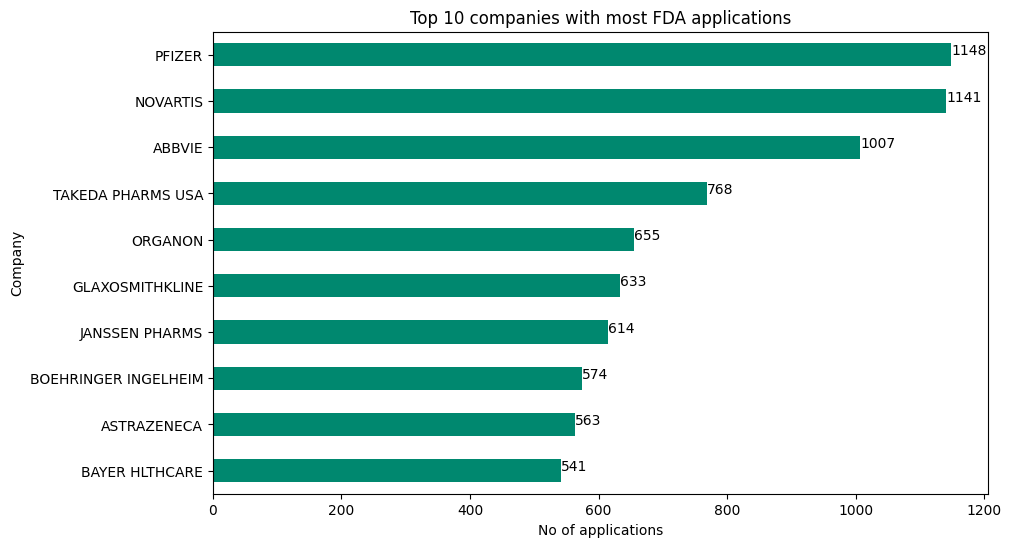

In [ ]:
# Which 10 companies have the most applications
company_counts = merged_df['SponsorName'].value_counts().head(10)

# Plot the bar plot
plt.figure(figsize=(10, 6))
bar_plot = company_counts.sort_values(ascending=True).plot(kind='barh', color='#00886F')
plt.title('Top 10 companies with most FDA applications')
plt.xlabel('No of applications')
plt.ylabel('Company')

# Add labels to the bars
for index, value in enumerate(company_counts.sort_values(ascending=True)):
    bar_plot.text(value, index, str(value))

# Show the plot
plt.show()

Here we can see that the company who has submitted the most applications with the FDA between 1998-2023 is Novartis, followed by Pfizer and Abbvie.

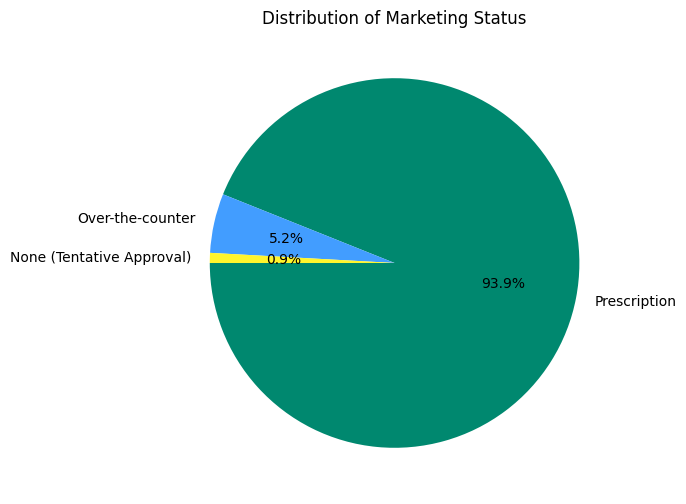

In [ ]:
#what is the distribution of the different marketing statuses
status_counts = merged_df['MarketingStatusDescription'].value_counts()

# Plot the bar plot
plt.figure(figsize=(6,6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=180, colors=['#00886F','#429DFF','#FFF52D'])
plt.title('Distribution of Marketing Status')


#Show the plot
plt.show()

Here we can see that the grand majoprity of applications were for prescription drugs.

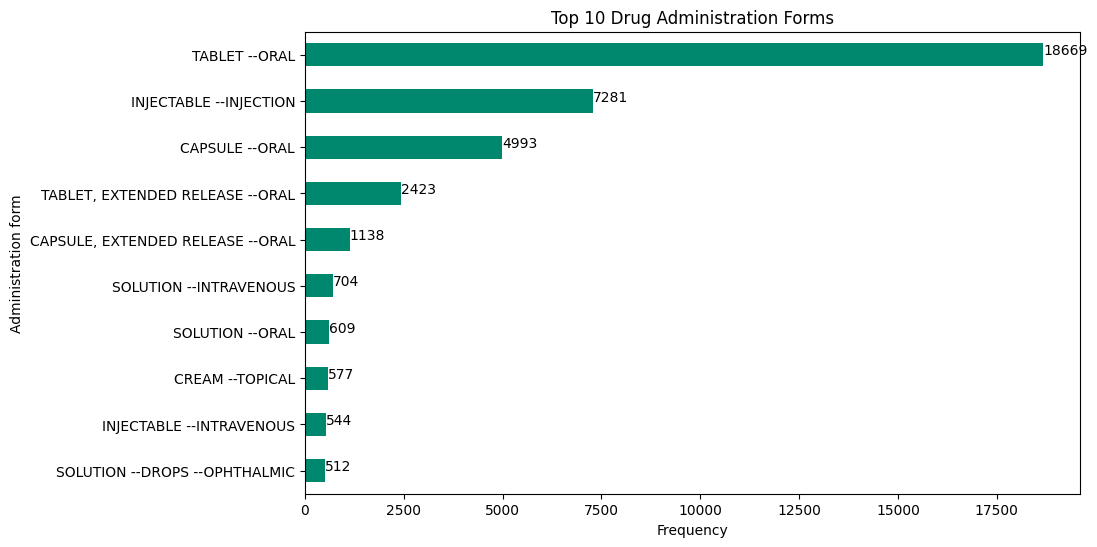

In [ ]:
#what is the frequency of the top 10 different administration forms
form_counts = df_products['Form'].value_counts().head(10).sort_values()

# Plot the bar plot
plt.figure(figsize=(10,6))
bar_plot = form_counts.sort_values(ascending=True).plot(kind='barh', color='#00886F')
plt.title('Top 10 Drug Administration Forms')
plt.ylabel('Administration form')
plt.xlabel('Frequency')

# Add labels to the bars
for index, value in enumerate(form_counts.sort_values(ascending=True)):
    bar_plot.text(value, index, str(value))

#Show the plot
plt.show()

Similarly, we can see that the administration form which shows up most frequently in the FDA applications are tablets to be taken orally, followed by injectables.

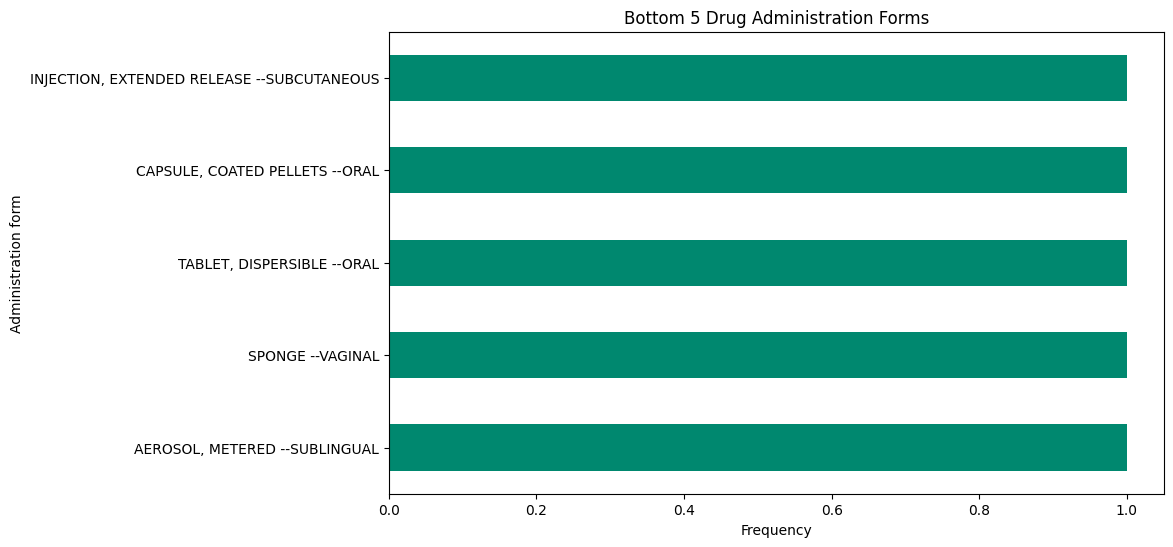

In [ ]:
#what is the frequency of the bottom 5 different administration forms
form_counts = df_products['Form'].value_counts().tail(5).sort_values()

# Plot the bar plot
plt.figure(figsize=(10,6))
form_counts.plot(kind='barh', color='#00886F')
plt.title('Bottom 5 Drug Administration Forms')
plt.ylabel('Administration form')
plt.xlabel('Frequency')


#Show the plot
plt.show()

Connected to previous, the least frequent in the FDA applications are orally consumed dispersible tablets, vaginal sponges, and sublingually consumed metered aerosols.